# University Marks Predicting model

In [1]:


#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=ResourceWarning)


# Data collection and Preprocessing

In [2]:
student_dataset = pd.read_csv('C:\\Users\\prati\\OneDrive\\Desktop\\.vscode\\Projects\\Univ-marks-predict-ML\\student_marks_dataset-avg.csv')

In [3]:
print(student_dataset.sample)

<bound method NDFrame.sample of                    Name  Sessional Marks  CAT-1  CAT-2  University Marks  \
0      Carolyn Phillips               26      2      7                27   
1        Clinton Cannon               67     35     35                66   
2           Jason Jones               51     32     28                52   
3       Jeffrey Barnett               42     35     25                42   
4         Ashley Mercer               11     11      0                13   
..                  ...              ...    ...    ...               ...   
655          David Paul                9     13     24                 7   
656        Andrea Moore               20     16     10                23   
657       Joshua Garcia               25      8     17                24   
658        David Finley               45     14     11                46   
659  Mr. Mario Ferguson               40     35     35                43   

     Total_CAT_Marks  
0                9.0  
1        

In [4]:
student_dataset.shape

(660, 6)

In [5]:
student_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              660 non-null    object 
 1   Sessional Marks   660 non-null    int64  
 2   CAT-1             660 non-null    int64  
 3   CAT-2             660 non-null    int64  
 4   University Marks  660 non-null    int64  
 5   Total_CAT_Marks   660 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 31.1+ KB


# Data Visualization

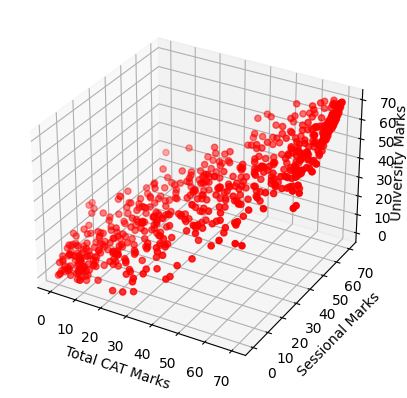

In [6]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(student_dataset['Total_CAT_Marks'], student_dataset['Sessional Marks'], student_dataset['University Marks'], c='r', marker='o')

ax.set_xlabel('Total CAT Marks', labelpad=3)
ax.set_ylabel('Sessional Marks', labelpad=3)
ax.set_zlabel('University Marks', labelpad=-3)

plt.show()


# Splitting the data into features (X) and target (y)

In [7]:
X = student_dataset[['Total_CAT_Marks', 'Sessional Marks']]
y = student_dataset['University Marks']

# Train & Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X.shape, X_train.shape, X_test.shape)  
print(y.shape, y_train.shape, y_test.shape)

(660, 2) (528, 2) (132, 2)
(660,) (528,) (132,)


# Model Training
# Multi Linear Regression

In [10]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [0.00732449 0.98890846]
Intercept: 1.65542042546263


# Model evaluation 

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_true = student_dataset['University Marks'].values  # Replace with your actual values
y_pred = student_dataset['University Marks'].values  # Use the same column for predictions

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# R-squared (R^2) Value
r_squared = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2) Value: {r_squared}")


Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R^2) Value: 1.0


# Visual inspection

In [14]:
y_test.shape

(132,)

In [15]:
y_pred.shape

(660,)

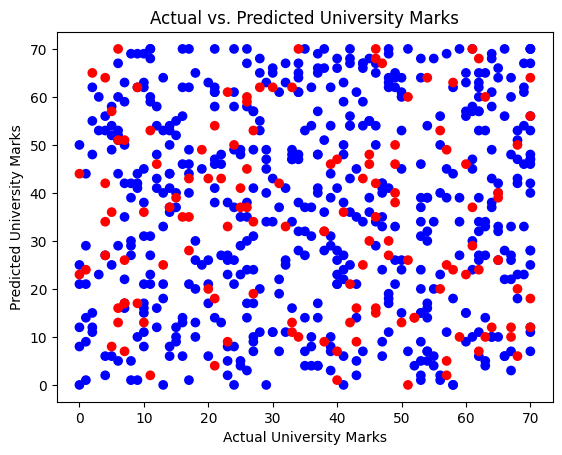

In [16]:
import matplotlib.pyplot as plt
import numpy as np


y_combined = np.concatenate((y_train, y_test))

# Create a scatter plot with different colors for actual and predicted values
plt.scatter(y_combined, y_pred, c=['blue'] * len(y_train) + ['red'] * len(y_test))
plt.xlabel("Actual University Marks")
plt.ylabel("Predicted University Marks")
plt.title("Actual vs. Predicted University Marks")
plt.show()


In [17]:
import warnings


warnings.filterwarnings("ignore", category=UserWarning)




In [18]:
c1 = int(input("Enter Your CAT-1 marks:- "))

c2 = int(input("Enter Your CAT-2 marks:- "))

total_c_score =(c1+c2)

s1 = int(input("Enter Your Sessional marks:- "))

new_data_point = [[total_c_score, s1]]

predicted_value = model.predict(new_data_point)

if(predicted_value>=70):
  predicted_value = 70

rounded_prediction = np.round(predicted_value, 2)

print("Your estimated University marks:- ",rounded_prediction)

Your estimated University marks:-  [3.82]
